## Innomatics Internship Task

In [1]:
# Tasks to be done :
    
# Step - 1: Download the csv file and read it in a Pandas Dataframe. Handle missing values and treat outliers. Don’t forget to visualise the data.

# Step - 2: Train different Machine Learning models:
# Logistic Regression
# SVM with Linear Kernel
# SVM with RBF Kernel
# Decision Tree
# KNN

# Step - 3: Perform proper hyperparameter tuning for each model from Step - 2 😢
# Step - 4: Compare all the models and write your observations i.e. why is one model better than the other?
# Add this observation at the end of your jupyter notebook
# Hint: Try to visualise the data 😮

# Step - 5: Upload your Jupyter Notebook on Github or Google Drive and submit the link in the form mentioned below. 

### Importing the libraries and the required dataset

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.shape # Shape of the dataset

(2227, 3)

In [5]:
df.head() # Top 5 values of the dataset

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [6]:
df.describe(include='all') # Statistical details of the datframe

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [7]:
df.info() # Summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


#### Handling the missing values and visualizing the dataframe

In [8]:
df.isnull().sum() 

x1    5
x2    3
y     0
dtype: int64

#### *Observation: Count of the null values is less compared to the size of the dataframe.So,droping the null values*

#### Dropping the null values

In [9]:
df.dropna(inplace=True) 

In [10]:
df.isnull().sum() # Checking for null values after dropping the null values

x1    0
x2    0
y     0
dtype: int64

In [11]:
df.columns 

Index(['x1', 'x2', 'y'], dtype='object')

#### Outlier-Detection

<AxesSubplot:xlabel='x1'>

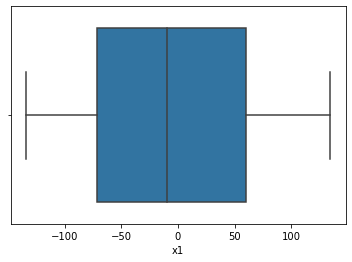

In [12]:
sns.boxplot(df['x1'])

<AxesSubplot:xlabel='x2'>

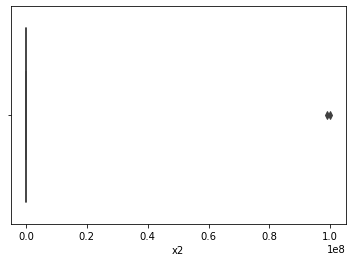

In [13]:
sns.boxplot(df.x2)

In [14]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['x1'])

Outliers: []


In [15]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['x2'])

Outliers: [99009998.0, 99999999.0]


#### *Observation: There were some outliers with in the dataset so by using Imputation treating the outliers*

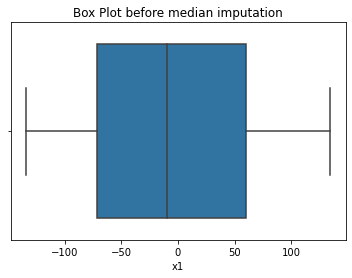

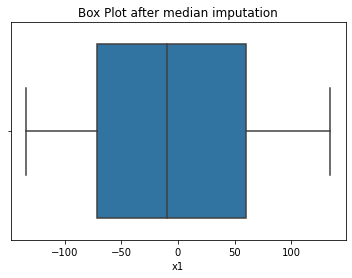

In [16]:
import matplotlib.pyplot as plt
sns.boxplot(df['x1'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['x1'].quantile(0.25)
q3 = df['x1'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['x1'])
for i in df['x1']:
    if i > Upper_tail or i < Lower_tail:
            df['x1'] = df['x1'].replace(i, med)
sns.boxplot(df['x1'])
plt.title("Box Plot after median imputation")
plt.show()            

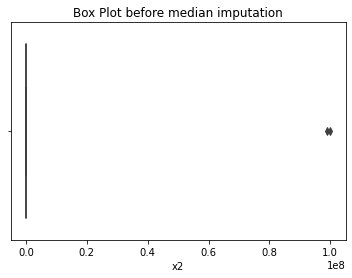

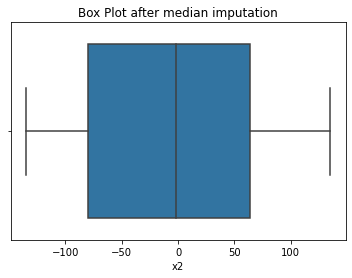

In [17]:
sns.boxplot(df['x2'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['x2'].quantile(0.25)
q3 = df['x2'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['x1'])
for i in df['x2']:
    if i > Upper_tail or i < Lower_tail:
            df['x2'] = df['x2'].replace(i, med)
sns.boxplot(df['x2'])
plt.title("Box Plot after median imputation")
plt.show()            

In [18]:
df['y'].value_counts() # Unique values in the target variable

0    1238
1     981
Name: y, dtype: int64

### Train-Test split & Model_Training

In [19]:
X = df.drop('y',axis = 1)

In [20]:
y= df['y']

In [21]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(2219, 2)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(standardized_data,y,test_size=0.25,random_state=0)

## Logistic Regression

In [24]:
from scipy.stats import randint 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5,6,7,8,9], 'penalty':['l2','l1','l3']}]
acc = ['accuracy','precision','recall']                    
for i in acc:                   
    clf = RandomizedSearchCV( LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'penalty': 'l2', 'C': 7}
LogisticRegression(C=7)
0.7513513513513513
Best parameters set found on train set:
for precision
{'penalty': 'l2', 'C': 7}
LogisticRegression(C=7)
1.0
Best parameters set found on train set:
for recall
{'penalty': 'l2', 'C': 7}
LogisticRegression(C=7)
0.44129554655870445


### Training

In [27]:
classifier = LogisticRegression(penalty='l2',C=8)
classifier.fit(x_train, y_train)

LogisticRegression(C=8)

### Prediction

In [28]:
y_test_predict=classifier.predict(x_test)

In [29]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [30]:
temp_data

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,0
40,1,1
...,...,...
1027,0,0
230,1,0
1561,0,0
1708,0,0


### Evaluation

In [31]:
print(metrics.roc_auc_score(y_test,y_test_predict))

0.7206477732793523


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       308
           1       1.00      0.44      0.61       247

    accuracy                           0.75       555
   macro avg       0.85      0.72      0.71       555
weighted avg       0.83      0.75      0.73       555



In [33]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[308,   0],
       [138, 109]], dtype=int64)

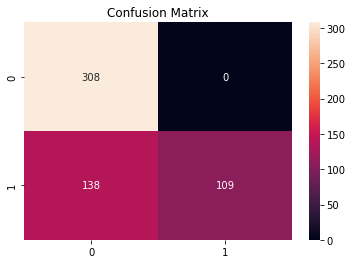

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## KNN

In [35]:
from scipy.stats import randint 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [36]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1, 2, 3]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)

    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'p': 2, 'n_neighbors': 5}
KNeighborsClassifier()
0.9405405405405406
Best parameters set found on train set:
for precision
{'p': 1, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=1)
0.9700854700854701
Best parameters set found on train set:
for recall
{'p': 2, 'n_neighbors': 5}
KNeighborsClassifier()
0.9311740890688259


### Training

In [37]:
classifier = KNeighborsClassifier(n_neighbors=4,p=1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

### Prediction

In [38]:
y_test_predict=classifier.predict(x_test)

In [39]:
temp_data1=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [40]:
temp_data1

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,1
40,1,1
...,...,...
1027,0,0
230,1,1
1561,0,0
1708,0,0


### Evaluation

In [41]:
print(metrics.roc_auc_score(y_test,y_test_predict))

0.9489523634260476


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       308
           1       0.96      0.93      0.94       247

    accuracy                           0.95       555
   macro avg       0.95      0.95      0.95       555
weighted avg       0.95      0.95      0.95       555



In [43]:
con_metric1 = metrics.confusion_matrix(y_test, y_test_predict)
con_metric1

array([[299,   9],
       [ 18, 229]], dtype=int64)

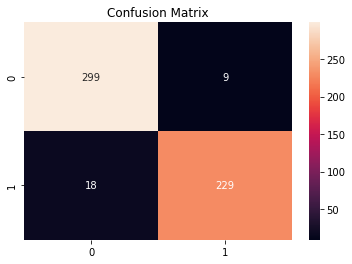

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric1, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## SVM

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

### Training

In [46]:
evaluation_metric=['accuracy']
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

for i in evaluation_metric:
    clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'kernel': 'rbf', 'gamma': 0.6890690453501394, 'C': 1}
SVC(C=1, gamma=0.6890690453501394)

0.9567567567567568


### SVM with rbf kernel

In [47]:
clf = SVC(kernel='rbf',C=1000)  
clf.fit(x_train,y_train)

SVC(C=1000)

### Prediction

In [48]:
y_test_predict=clf.predict(x_test)

In [49]:
temp_data2=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [50]:
temp_data2

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,1
40,1,1
...,...,...
1027,0,0
230,1,1
1561,0,0
1708,0,0


### Evaluation

In [51]:
print(metrics.roc_auc_score(y_test,y_test_predict))

0.9468886376781114


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       308
           1       0.93      0.96      0.94       247

    accuracy                           0.95       555
   macro avg       0.94      0.95      0.95       555
weighted avg       0.95      0.95      0.95       555



In [53]:
con_metric2 = metrics.confusion_matrix(y_test, y_test_predict)
con_metric2

array([[289,  19],
       [ 11, 236]], dtype=int64)

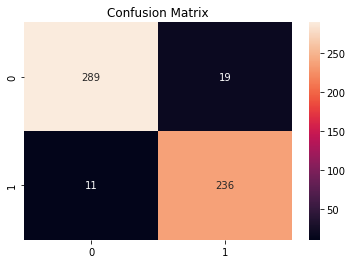

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric2, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Decision Tree

In [55]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

In [56]:
evaluation_metric=['accuracy','precision']
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
tree = DecisionTreeClassifier() 
for i in evaluation_metric:
    trees= RandomizedSearchCV(tree, param_dist, cv = 5,scoring='{}'.format(i))
    print('for {}'.format(i))
    trees.fit(x_train, y_train) 
    print("Tuned Decision Tree Parameters: {}".format(trees.best_params_)) 
    print("Best score is {}".format(trees.best_score_))

for accuracy
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.9417109880965302
for precision
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 8}
Best score is 0.9202202889702888


### Training

In [57]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=2,min_samples_leaf=7)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2, min_samples_leaf=7)

### Prediction

In [58]:
y_test_predict=classifier.predict(x_test)

In [59]:
temp_data3=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [60]:
temp_data3

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,1
40,1,1
...,...,...
1027,0,0
230,1,1
1561,0,0
1708,0,0


### Evaluation

In [61]:
print(metrics.roc_auc_score(y_test,y_test_predict))

0.9367671801882329


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       308
           1       0.92      0.94      0.93       247

    accuracy                           0.94       555
   macro avg       0.94      0.94      0.94       555
weighted avg       0.94      0.94      0.94       555



In [63]:
con_metric3 = metrics.confusion_matrix(y_test, y_test_predict)
con_metric3

array([[289,  19],
       [ 16, 231]], dtype=int64)

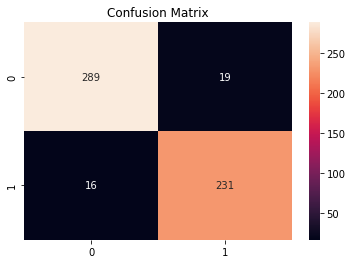

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric3, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Conclusion

After doing hyper parameter tuning,KNN gives 95% accuracy
                                   SVM gives 95% accuracy 
                                   Decision Tree gives 94% accuracy
                                   and Logistic regression gives 75% accuracy of the given dataset.
                                   
According to my opinion KNN , SVM with Rbf Kernal , Decision Tree are the best models